<a href="https://colab.research.google.com/github/PeterMangoro/new_traffic_violation/blob/main/traffic_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

*   Step by step loading of dataset into google colab

*   Importing neccesary files
*   Testing the loaded file




In [ ]:
# save path
path = "/content/drive/MyDrive/Colab Notebooks/VisualDesignStoryTelling/"

In [ ]:
# load tickets dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from pandas import DataFrame

# suppress warnings
warnings.filterwarnings('ignore')

df = DataFrame(pd.read_csv(path +'Traffic_Tickets_Issued_Window_2023.csv'))

# test loaded file
df.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,3191U,OPERATING W/O INSURANCE,2023,10,WEDNESDAY,29.0,F,PENNSYLVANIA,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
1,4011AG,UNREG VEH > 60 DAYS,2023,12,WEDNESDAY,39.0,M,NEW YORK,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
2,1110A,DISOBEYED TRAFFIC DEVICE,2023,12,WEDNESDAY,23.0,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB
3,1111D1N,NYC REDLIGHT,2023,12,WEDNESDAY,23.0,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB
4,5091G,UNLICENSED GT 60DAYS,2023,12,WEDNESDAY,23.0,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB


# Data Cleaning


In [ ]:
# identify null columns
df.isnull().sum()

,0
Violation Charged Code,0
Violation Description,0
Violation Year,0
Violation Month,0
Violation Day of Week,0
Age at Violation,44408
Gender,0
State of License,0
Police Agency,0
Court,0


In [ ]:
# identify null rows
df[df['Age at Violation'].isna()==1]

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
662,4017FBW,EXCESS WGHT GE 18000,2023,3,FRIDAY,NaN,C,UNKNOWN,NYC POLICE DEPT,BROOKLYN NORTH TVB,TVB
679,38510,OVERLOADED VEHICLE 3 OR MORE AXLES,2023,3,FRIDAY,NaN,C,UNKNOWN,NYC POLICE DEPT,BROOKLYN NORTH TVB,TVB
684,415B10,OVWGT 3/MORE AXL NYC,2023,3,FRIDAY,NaN,C,UNKNOWN,NYC POLICE DEPT,BROOKLYN NORTH TVB,TVB
686,37510E,NO REAR OBJECT DETECTION SYSTEM DELIVERY TRUCK,2023,3,FRIDAY,NaN,C,UNKNOWN,NYC POLICE DEPT,BROOKLYN NORTH TVB,TVB
736,4017FBW,EXCESS WGHT GE 18000,2023,3,FRIDAY,NaN,M,UNKNOWN,NYC POLICE DEPT,BROOKLYN NORTH TVB,TVB
...,...,...,...,...,...,...,...,...,...,...,...
2793377,1402CII,MOTR CARRIER OPER VEH IN VIOLATION OF SAFETY R...,2023,11,TUESDAY,NaN,C,UNKNOWN,SUFFOLK COUNTY POLICE DEPT,SUFFOLK COUNTY TPVA,TSLED
2793394,1402CII,MOTR CARRIER OPER VEH IN VIOLATION OF SAFETY R...,2023,11,TUESDAY,NaN,C,UNKNOWN,SUFFOLK COUNTY POLICE DEPT,SUFFOLK COUNTY TPVA,TSLED
2793395,1402CII,MOTR CARRIER OPER VEH IN VIOLATION OF SAFETY R...,2023,10,THURSDAY,NaN,C,UNKNOWN,SUFFOLK COUNTY POLICE DEPT,SUFFOLK DISTRICT COURT,TSLED
2795319,306B,UNINSPECTED MOTOR VEHICLE,2023,11,MONDAY,NaN,C,UNKNOWN,NYS EN-CON SUNY STONY BROOK,SUFFOLK DISTRICT COURT,TSLED


In [ ]:
# describe the age data
stats = df['Age at Violation'].describe()
stats

,Age at Violation
count,2.751185e+06
mean,3.647965e+01
std,1.372628e+01
min,1.600000e+01
25%,2.500000e+01
50%,3.400000e+01
75%,4.500000e+01
max,9.500000e+01


In [ ]:
# replace null values with mean

df['Age at Violation'] = df['Age at Violation'].fillna(stats['mean'])
df['Age at Violation'] = df['Age at Violation'].astype(int)

# check for null values
df.isnull().sum()

,0
Violation Charged Code,0
Violation Description,0
Violation Year,0
Violation Month,0
Violation Day of Week,0
Age at Violation,0
Gender,0
State of License,0
Police Agency,0
Court,0


In [ ]:
  # key the days
days = {
      'MONDAY' :0,
      'TUESDAY' :1,
      'WEDNESDAY' :2,
      'THURSDAY' :3,
      'FRIDAY' :4,
      'SATURDAY' :5,
      'SUNDAY' :6
  }
# Create a new column for the day number
df['day_number'] = df['Violation Day of Week'].map(days)

# Create a datetime index to get the first day of each month
first_of_month = pd.to_datetime(df['Violation Year'].astype(str) + '-' + df['Violation Month'].astype(str) + '-01')

# Calculate the actual date by finding the first occurrence of the day of the week
df['violation_date'] = first_of_month + pd.to_timedelta((df['day_number'] - first_of_month.dt.dayofweek) % 7, unit='d')

# Drop the day_number column
df.drop(columns='day_number', inplace=True)
df.drop(columns='Violation Year', inplace=True)
df


,Violation Charged Code,Violation Description,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source,violation_date
0,3191U,OPERATING W/O INSURANCE,10,WEDNESDAY,29,F,PENNSYLVANIA,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB,2023-10-04
1,4011AG,UNREG VEH > 60 DAYS,12,WEDNESDAY,39,M,NEW YORK,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB,2023-12-06
2,1110A,DISOBEYED TRAFFIC DEVICE,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
3,1111D1N,NYC REDLIGHT,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
4,5091G,UNLICENSED GT 60DAYS,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
...,...,...,...,...,...,...,...,...,...,...,...
2795588,5098,FLD/NOTIFY DMV CHANGE OF ADDRESS,9,WEDNESDAY,20,M,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-09-06
2795589,1180D,SPEED IN ZONE,9,FRIDAY,36,F,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-09-01
2795590,306B,UNINSPECTED MOTOR VEHICLE,10,FRIDAY,57,M,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-10-06
2795591,5091,UNLICENSED OPERATOR,8,SATURDAY,29,F,UNKNOWN,PERRY VILLAGE POLICE DEPT,PERRY VILLAGE COURT,TSLED,2023-08-05


In [ ]:
# confirm datetime type
print(df.dtypes)

Violation Charged Code            object
Violation Description             object
Violation Month                    int64
Violation Day of Week             object
Age at Violation                   int64
Gender                            object
State of License                  object
Police Agency                     object
Court                             object
Source                            object
violation_date            datetime64[ns]
dtype: object


In [ ]:
# check duplicate data
duplicates = df.duplicated()
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
2795588,False
2795589,False
2795590,False
2795591,False


In [ ]:
df.drop_duplicates(inplace=True)
df

,Violation Charged Code,Violation Description,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source,violation_date
0,3191U,OPERATING W/O INSURANCE,10,WEDNESDAY,29,F,PENNSYLVANIA,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB,2023-10-04
1,4011AG,UNREG VEH > 60 DAYS,12,WEDNESDAY,39,M,NEW YORK,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB,2023-12-06
2,1110A,DISOBEYED TRAFFIC DEVICE,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
3,1111D1N,NYC REDLIGHT,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
4,5091G,UNLICENSED GT 60DAYS,12,WEDNESDAY,23,M,INDIANA,TRIBOROUGH BRIDGE TUNNEL AUTH,MANHATTAN SOUTH TVB,TVB,2023-12-06
...,...,...,...,...,...,...,...,...,...,...,...
2795587,5111A,AGGRAVATED UNLIC OPER 3RD MISD,9,WEDNESDAY,20,M,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-09-06
2795588,5098,FLD/NOTIFY DMV CHANGE OF ADDRESS,9,WEDNESDAY,20,M,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-09-06
2795589,1180D,SPEED IN ZONE,9,FRIDAY,36,F,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-09-01
2795590,306B,UNINSPECTED MOTOR VEHICLE,10,FRIDAY,57,M,NEW YORK,MAMARONECK VILLAGE POLICE DEPT,MAMARONECK VILLAGE COURT,TSLED,2023-10-06


# Exploratory Data Analysis

In [ ]:
# EDA for Age
df['Age at Violation'].describe()

,Age at Violation
count,2.433998e+06
mean,3.684846e+01
std,1.390577e+01
min,1.600000e+01
25%,2.600000e+01
50%,3.400000e+01
75%,4.600000e+01
max,9.500000e+01


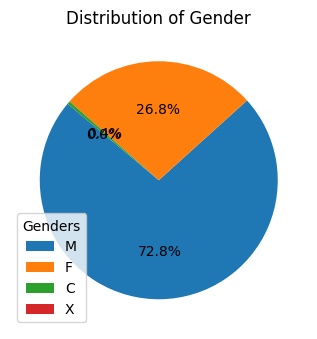

In [ ]:
# Pie Chart for Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
wedges, texts, autotexts = plt.pie(gender_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.legend(wedges, gender_counts.index, title="Genders", loc="best")

# Show the plots
plt.tight_layout()
plt.show()

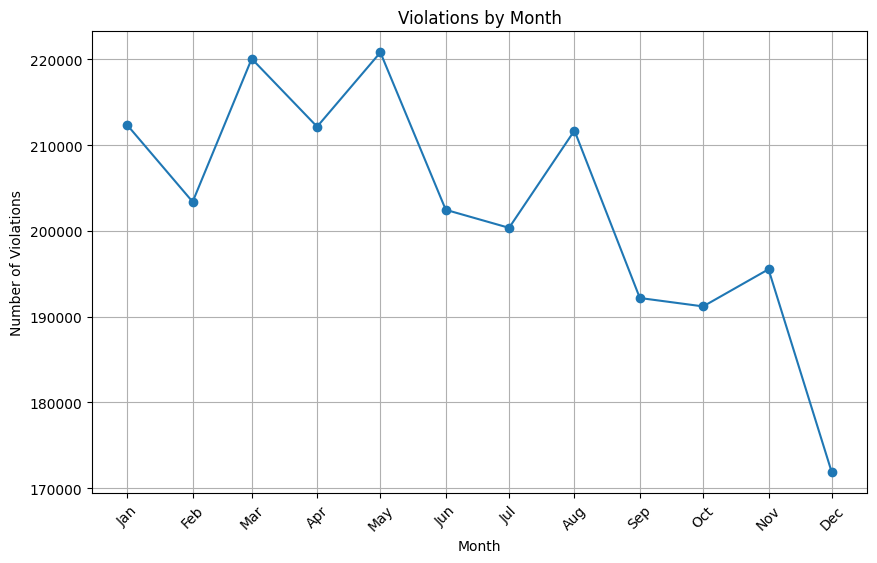

In [ ]:
# Line graph to show violations by month

# group data by month
monthly_violations = df.groupby(['Violation Month']).size().reset_index(name='Count')

monthly_violations['Date'] = pd.to_datetime(monthly_violations['Violation Month'].astype(str) + '-01-2023')
monthly_violations = monthly_violations.sort_values(by='Date')

plt.figure(figsize=(10, 6))
plt.plot(monthly_violations['Date'], monthly_violations['Count'], marker='o', linestyle='-')
plt.title('Violations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(monthly_violations['Date'],
labels = monthly_violations['Date'].dt.strftime('%b'),rotation=45)
plt.grid(True)
plt.show()

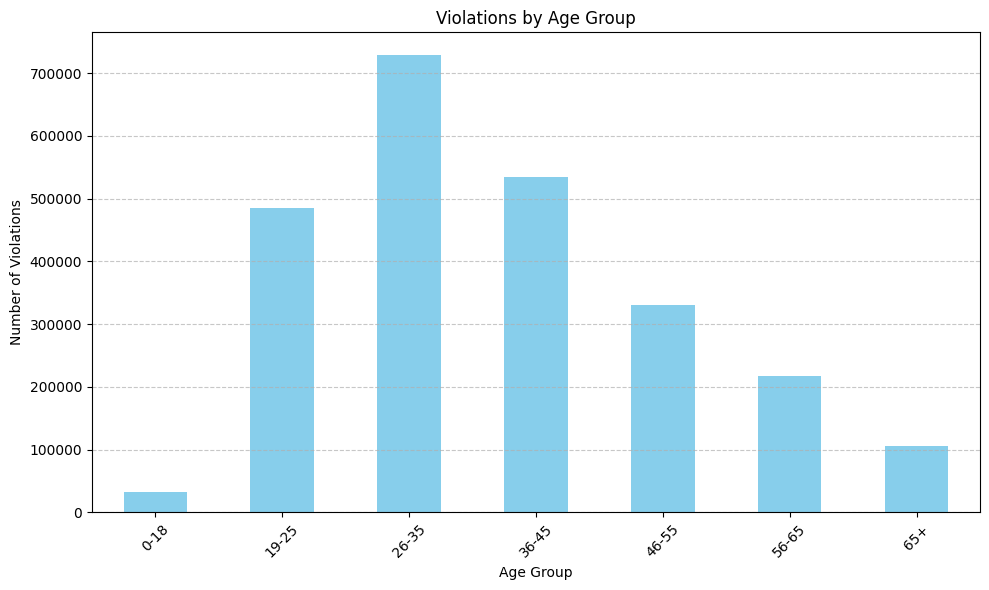

In [ ]:
# plot data by age group

bins = [0,18,25,35,45,55,65,100]
labels = ['0-18','19-25','26-35','36-45','46-55','56-65','65+']
df['Age Group'] = pd.cut(df['Age at Violation'], bins=bins, labels=labels, right=False)

age_group_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Violations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

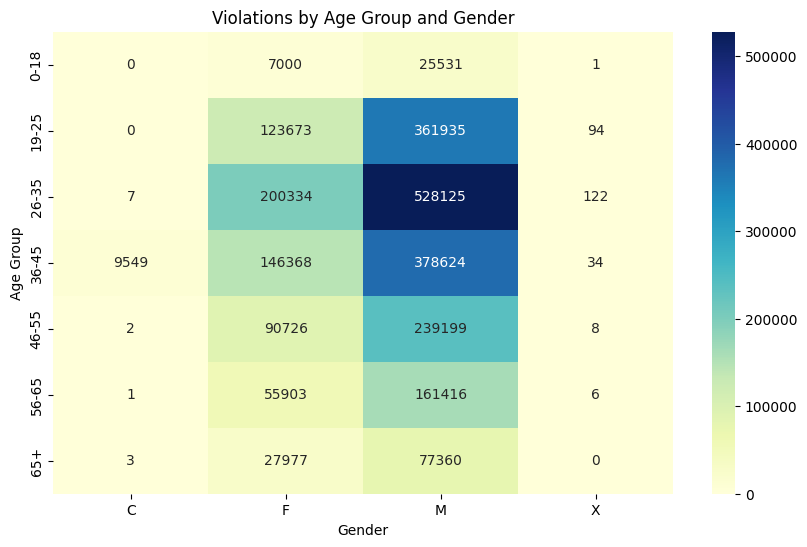

In [ ]:
heatmap_data = df.pivot_table(index='Age Group', columns = 'Gender',values='Violation Charged Code',aggfunc='count',fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Violations by Age Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

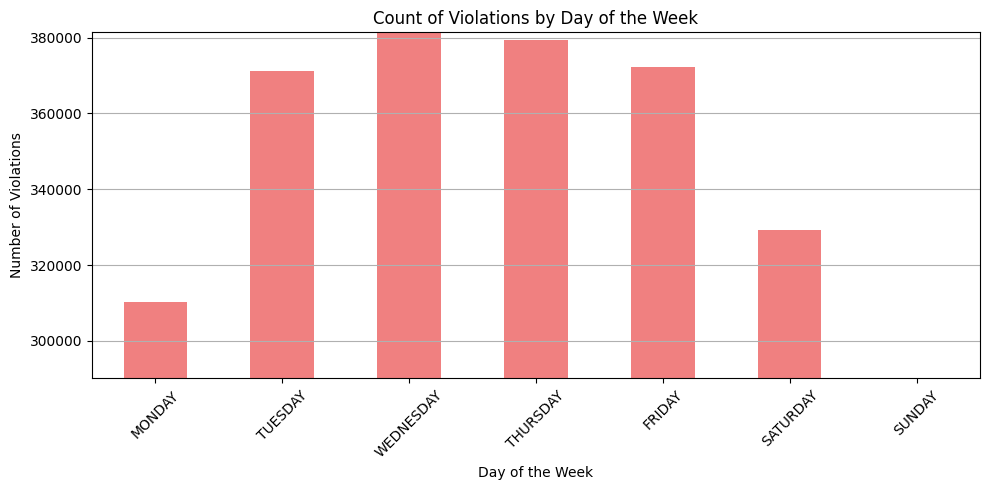

In [ ]:
# Violation count by day of week
day_counts = df['Violation Day of Week'].value_counts().reindex(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])

plt.figure(figsize=(10, 5))
day_counts.plot(kind='bar', color='lightcoral')
plt.title('Count of Violations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Violations')

# Adjust the y-axis to start from the minimum value of the data
plt.ylim(day_counts.min(), day_counts.max() + 2)  # Start from minimum count

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv(path + 'cleaned_traffic_tickets.csv', index=False)